# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
from pandas.io.json import json_normalize
from sklearn import datasets, linear_model

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [76]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



619

In [77]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q="



for index, city in np.ndenumerate(cities):
    print(index[0],": ", city)
    

0 :  pangnirtung
1 :  markivka
2 :  kapaa
3 :  cherskiy
4 :  taolanaro
5 :  souillac
6 :  paamiut
7 :  codrington
8 :  puerto ayora
9 :  bredasdorp
10 :  cape town
11 :  hobart
12 :  victoria
13 :  udachnyy
14 :  barrow
15 :  vaini
16 :  gardenstown
17 :  ilulissat
18 :  jalu
19 :  barentsburg
20 :  pangoa
21 :  manacapuru
22 :  ostrovnoy
23 :  rikitea
24 :  emba
25 :  comodoro rivadavia
26 :  sola
27 :  thompson
28 :  yellowknife
29 :  mahebourg
30 :  upernavik
31 :  palimbang
32 :  bluff
33 :  cascais
34 :  narsaq
35 :  bambous virieux
36 :  dikson
37 :  grand-lahou
38 :  mar del plata
39 :  tasiilaq
40 :  lerwick
41 :  la ronge
42 :  ponta do sol
43 :  busselton
44 :  omboue
45 :  port elizabeth
46 :  pisco
47 :  vaitupu
48 :  krutinka
49 :  tuktoyaktuk
50 :  punta arenas
51 :  saldanha
52 :  jutai
53 :  east wenatchee bench
54 :  katsuura
55 :  buala
56 :  praia da vitoria
57 :  cockburn harbour
58 :  lorengau
59 :  ko samui
60 :  manta
61 :  port alfred
62 :  taltal
63 :  kavieng


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [79]:
city_set=np.array_split(cities, 14)
i=0
j=0
print("Beginning Data Retrieval\n-----------------------------")
for set in city_set:
    j=j+1
    for city in set:        
        resp = requests.get(query_url + city)
        rtext = json.loads(resp.text)
        response = json_normalize(rtext)
        if resp.status_code == 200:
            if (i == 0) :
                CityData=pd.DataFrame(response)
            else:
                df=pd.DataFrame(response)
                CityData=CityData.append(df,verify_integrity=False, sort=False,ignore_index=True)
            i = i+1
            print(f"Processing Record {i} of Set {j} | {city}")
        else:
            print(f"City | {city} | not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")


    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | pangnirtung
Processing Record 2 of Set 1 | markivka
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | cherskiy
City | taolanaro | not found. Skipping...
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | paamiut
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | udachnyy
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | gardenstown
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | jalu
City | barentsburg | not found. Skipping...
Processing Record 19 of Set 1 | pangoa
Processing Record 20 of Set 1 | manacapuru
Processing Record 21 of Set 1 | ostrovnoy
Proce

Processing Record 185 of Set 5 | ouadda
Processing Record 186 of Set 5 | qiryat shemona
Processing Record 187 of Set 5 | provideniya
Processing Record 188 of Set 5 | dudinka
Processing Record 189 of Set 5 | hojai
City | palabuhanratu | not found. Skipping...
Processing Record 190 of Set 5 | tiksi
Processing Record 191 of Set 5 | mitsamiouli
Processing Record 192 of Set 5 | griffith
Processing Record 193 of Set 5 | tomatlan
Processing Record 194 of Set 5 | ribeira grande
Processing Record 195 of Set 5 | kodiak
City | illoqqortoormiut | not found. Skipping...
Processing Record 196 of Set 5 | hilo
Processing Record 197 of Set 5 | nikolayevsk-na-amure
Processing Record 198 of Set 5 | mongu
Processing Record 199 of Set 5 | victor harbor
Processing Record 200 of Set 5 | nioro
Processing Record 201 of Set 5 | haines junction
Processing Record 202 of Set 5 | baglung
City | chagda | not found. Skipping...
Processing Record 203 of Set 5 | barabai
Processing Record 204 of Set 5 | poplar bluff
Pro

Processing Record 359 of Set 9 | puerto ayacucho
Processing Record 360 of Set 9 | racale
City | jiroft | not found. Skipping...
Processing Record 361 of Set 9 | rudnya
Processing Record 362 of Set 9 | la orilla
Processing Record 363 of Set 9 | zhezkazgan
Processing Record 364 of Set 9 | davidson
Processing Record 365 of Set 10 | koshurnikovo
Processing Record 366 of Set 10 | namatanai
Processing Record 367 of Set 10 | padra
Processing Record 368 of Set 10 | aguimes
Processing Record 369 of Set 10 | den helder
Processing Record 370 of Set 10 | beringovskiy
Processing Record 371 of Set 10 | port blair
Processing Record 372 of Set 10 | sioux lookout
City | vreed en hoop | not found. Skipping...
Processing Record 373 of Set 10 | ayan
Processing Record 374 of Set 10 | banda aceh
Processing Record 375 of Set 10 | vetapalem
Processing Record 376 of Set 10 | khovu-aksy
Processing Record 377 of Set 10 | lakatoro
Processing Record 378 of Set 10 | ambulu
Processing Record 379 of Set 10 | dekalb
P

Processing Record 532 of Set 14 | moa
Processing Record 533 of Set 14 | zalantun
Processing Record 534 of Set 14 | la empalizada
Processing Record 535 of Set 14 | santiago
Processing Record 536 of Set 14 | bairiki
Processing Record 537 of Set 14 | warrington
Processing Record 538 of Set 14 | abha
Processing Record 539 of Set 14 | walvis bay
Processing Record 540 of Set 14 | namibe
Processing Record 541 of Set 14 | lima
Processing Record 542 of Set 14 | broome
Processing Record 543 of Set 14 | caloundra
Processing Record 544 of Set 14 | vorotynets
Processing Record 545 of Set 14 | xiaoweizhai
Processing Record 546 of Set 14 | vieste
Processing Record 547 of Set 14 | general nakar
Processing Record 548 of Set 14 | kayerkan
Processing Record 549 of Set 14 | vardo
Processing Record 550 of Set 14 | ullapool
Processing Record 551 of Set 14 | menongue
Processing Record 552 of Set 14 | krasyukovskaya
City | kamenskoye | not found. Skipping...
Processing Record 553 of Set 14 | coihaique
City | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [80]:

outputpath="../output_data/"
csvpath="../output_data/city_data.csv"
CityData.to_csv(csvpath,header=True,index_label="City ID")
city_data = pd.read_csv(csvpath, encoding="utf-8")



In [81]:
CityData_Organized=city_data[["City ID","name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon",
                                 "main.temp_max",
                                 "wind.speed"]]
CityDataOrganized= CityData_Organized.rename(columns={
                        "City ID" : "City ID",
                        "name" : "City Name", 
                        "clouds.all" : "Cloudiness" ,
                       	"sys.country" : "Country" ,
                        "dt" : "Date"  ,
                        "coord.lat" : "Latitude" ,
                        "coord.lon" : "Longitude" ,                      
                        "main.humidity" : "Humidity",                        
                        "main.temp_max" : "Max Temperature",
                        "wind.speed" :"Wind Speed"
                        })
CityDataOrganized.to_csv(outputpath + "CityDataStructured.csv",index=False)
CityDataOrganized.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,0,Pangnirtung,20,CA,1581187681,74,66.15,-65.71,-23.80,4.56
1,1,Markivka,100,UA,1581187681,82,49.52,39.57,14.77,9.22
2,2,Kapaa,20,US,1581187430,63,22.08,-159.32,69.80,8.05
3,3,Cherskiy,95,RU,1581187681,75,68.75,161.30,-32.13,3.20
4,4,Souillac,75,MU,1581187618,88,-20.52,57.52,77.00,10.29


In [82]:
CityDataS = pd.DataFrame(CityDataOrganized.loc[CityDataOrganized["Latitude"] >= 0].reindex()).sort_values(by="Latitude")
CityDataS.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
440,440,Pemangkat,100,ID,1581187659,87,1.17,108.97,76.41,3.85
535,535,Bairiki Village,75,KI,1581187667,78,1.33,172.98,78.80,2.24
490,490,Lisala,99,CD,1581187664,43,2.15,21.52,83.80,1.21
89,89,El Retorno,22,CO,1581187626,33,2.33,-72.63,95.09,8.79
86,86,Butaritari,99,KI,1581187625,79,3.07,172.79,83.82,22.70


In [83]:


# Create a data frame from dictionary
cityData= pd.DataFrame(CityDataOrganized)

cityData.head(10) 

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,0,Pangnirtung,20,CA,1581187681,74,66.15,-65.71,-23.80,4.56
1,1,Markivka,100,UA,1581187681,82,49.52,39.57,14.77,9.22
2,2,Kapaa,20,US,1581187430,63,22.08,-159.32,69.80,8.05
3,3,Cherskiy,95,RU,1581187681,75,68.75,161.30,-32.13,3.20
4,4,Souillac,75,MU,1581187618,88,-20.52,57.52,77.00,10.29
5,5,Paamiut,96,GL,1581187681,67,61.99,-49.67,9.66,12.68
6,6,Codrington,0,AU,1581187681,84,-38.27,141.97,64.94,18.75
7,7,Puerto Ayora,20,EC,1581187681,70,-0.74,-90.35,84.20,17.22
8,8,Bredasdorp,37,ZA,1581187619,77,-34.53,20.04,70.00,8.05
9,9,Cape Town,50,ZA,1581187681,82,-33.93,18.42,75.00,12.75


In [84]:
cityData.count()

City ID            564
City Name          564
Cloudiness         564
Country            561
Date               564
Humidity           564
Latitude           564
Longitude          564
Max Temperature    564
Wind Speed         564
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

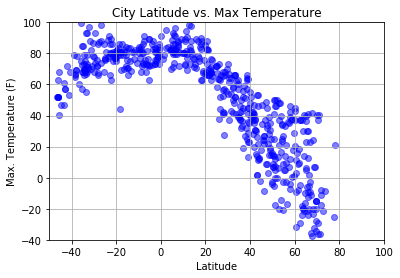

This graph demonstrates the correlation that as we move away from the equator the temperature drop rapidly


In [85]:
today = time.strftime("%m/%d/%y")
# Build a scatter plot for each data type
plt.scatter(cityData["Latitude"], cityData["Max Temperature"], marker="o", color='b', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-50,100)
plt.ylim(-40,100)

plt.grid()
plt.show()
print(f"This graph demonstrates the correlation that as we move away from the equator the temperature drop rapidly")



#### Latitude vs. Humidity Plot

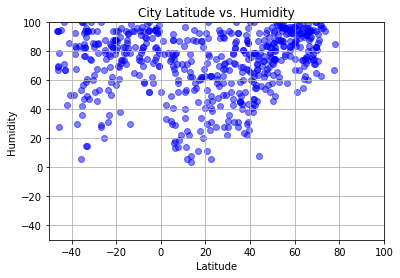

This graph shows that there is no significant correlation between these two factors


In [86]:
# Build a scatter plot for each data type
plt.scatter(cityData["Latitude"], cityData["Humidity"], marker="o",color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.xlim(-50,100)
plt.ylim(-50,100)
plt.grid()

plt.show()
print(f"This graph shows that there is no significant correlation between these two factors")


# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

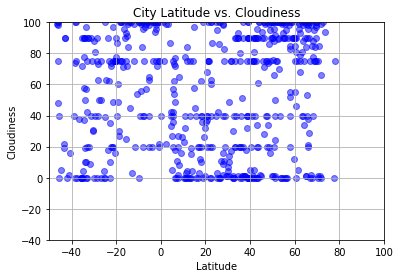

This graph shows there is no significant correlation between these two factors


In [87]:
# Build a scatter plot for each data type
plt.scatter(cityData["Latitude"], cityData["Cloudiness"], marker="o",color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-50,100)
plt.ylim(-40,100)
plt.grid() 

plt.show()
print(f"This graph shows there is no significant correlation between these two factors")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

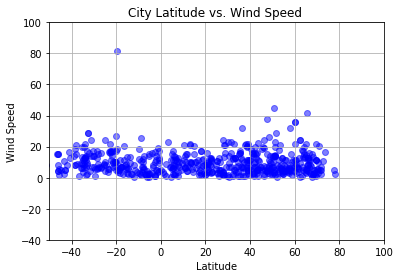

There is no significant correlation between thes two factors


In [88]:
# Build a scatter plot for each data type
plt.scatter(cityData["Latitude"],cityData["Wind Speed"], marker="o", color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-50,100)
plt.ylim(-40,100)
plt.grid()

plt.show()
print(f"There is no significant correlation between thes two factors")


# Show plot
plt.show()

## Linear Regression

In [89]:
NorthernHemisphere = cityData[cityData["Latitude"] > 0]
NorthernHemisphere

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,0,Pangnirtung,20,CA,1581187681,74,66.15,-65.71,-23.80,4.56
1,1,Markivka,100,UA,1581187681,82,49.52,39.57,14.77,9.22
2,2,Kapaa,20,US,1581187430,63,22.08,-159.32,69.80,8.05
3,3,Cherskiy,95,RU,1581187681,75,68.75,161.30,-32.13,3.20
5,5,Paamiut,96,GL,1581187681,67,61.99,-49.67,9.66,12.68
...,...,...,...,...,...,...,...,...,...,...
557,557,Porto Santo,20,PT,1581187669,82,33.07,-16.34,66.20,12.75
558,558,Meadow Lake,1,US,1581187670,28,34.80,-106.54,57.20,10.29
559,559,Makakilo City,75,US,1581187670,100,21.35,-158.09,66.20,5.82
560,560,Verkhoyansk,0,RU,1581187670,81,67.54,133.38,-37.26,0.31


In [90]:
SouthernHemisphere = cityData[cityData["Longitude"] < 0]
SouthernHemisphere

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,0,Pangnirtung,20,CA,1581187681,74,66.15,-65.71,-23.80,4.56
2,2,Kapaa,20,US,1581187430,63,22.08,-159.32,69.80,8.05
5,5,Paamiut,96,GL,1581187681,67,61.99,-49.67,9.66,12.68
7,7,Puerto Ayora,20,EC,1581187681,70,-0.74,-90.35,84.20,17.22
13,13,Barrow,1,US,1581187682,98,71.29,-156.79,-36.40,4.70
...,...,...,...,...,...,...,...,...,...,...
555,555,Egvekinot,100,RU,1581187669,94,66.32,-179.17,-20.16,15.66
557,557,Porto Santo,20,PT,1581187669,82,33.07,-16.34,66.20,12.75
558,558,Meadow Lake,1,US,1581187670,28,34.80,-106.54,57.20,10.29
559,559,Makakilo City,75,US,1581187670,100,21.35,-158.09,66.20,5.82


In [91]:
#OPTIONAL: Create a function to create Linear Regression plots
def myLinearRegressionPlot(x,y,xlabel,ylabel,GraphTitle,lx,ly):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    RegressionCalculation = x * slope + intercept
    LinearEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(GraphTitle)
    plt.plot(x,RegressionCalculation,"r-")
    plt.annotate(LinearEquation,(lx,ly),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    plt.savefig(f"{ouputpath}LinearRegression_{xlabel}vs{ylabel}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.869232516587715


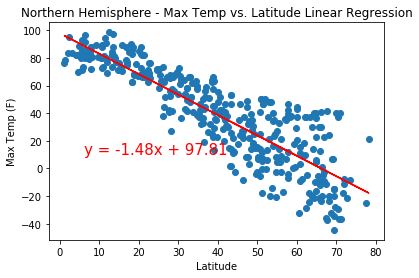

In [92]:
x_values = NorthernHemisphere['Latitude']
y_values = NorthernHemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7724137196738949


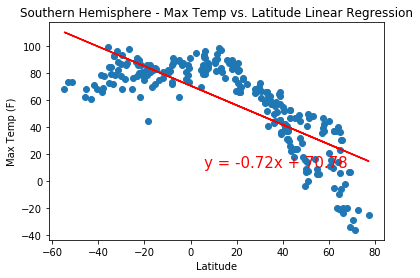

In [93]:
x_values = SouthernHemisphere['Latitude']
y_values = SouthernHemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

In [94]:
print(f"The comparrison of the temperatures within the northern and sothern hemisphere's against latitude demonstrates that the temperature in creases as you approach the equator")

The comparrison of the temperatures within the northern and sothern hemisphere's against latitude demonstrates that the temperature in creases as you approach the equator


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.48130888385549575


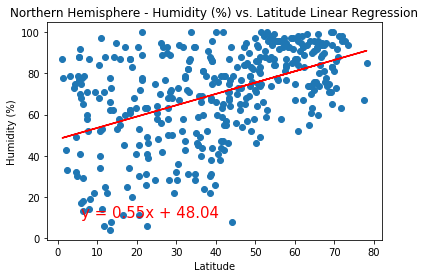

In [95]:
x_values = NorthernHemisphere['Latitude']
y_values = NorthernHemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2929824255239177


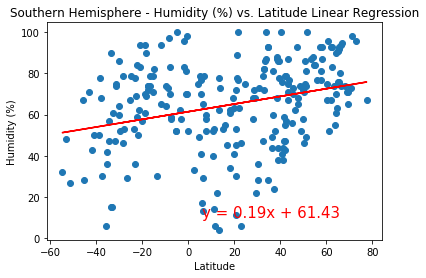

In [96]:
x_values = SouthernHemisphere['Latitude']
y_values = SouthernHemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

In [97]:
print(f"There was no notable relatoionship between humidity and latitude that can be identified")

There was no notable relatoionship between humidity and latitude that can be identified


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3203806528162104


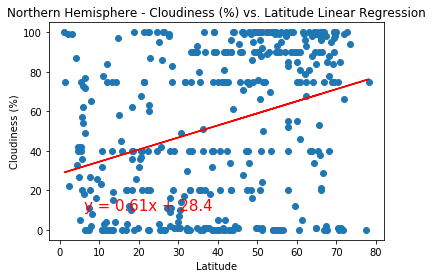

In [98]:
x_values =  NorthernHemisphere['Latitude']
y_values =  NorthernHemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1911431459320782


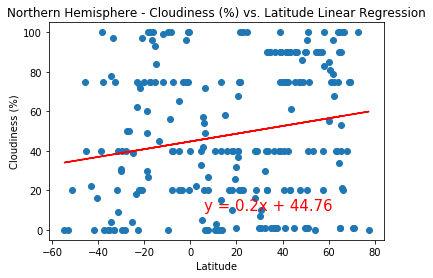

In [99]:
x_values = SouthernHemisphere['Latitude']
y_values = SouthernHemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

In [100]:
print(f"There was not a notable relatoionship between cloudiness and latitude that was identified")

There was not a notable relatoionship between cloudiness and latitude that was identified


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05423282060116563


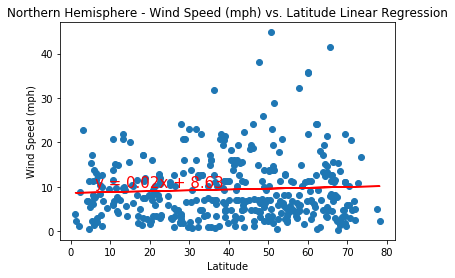

In [101]:
x_values = NorthernHemisphere['Latitude']
y_values = NorthernHemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12587640911408407


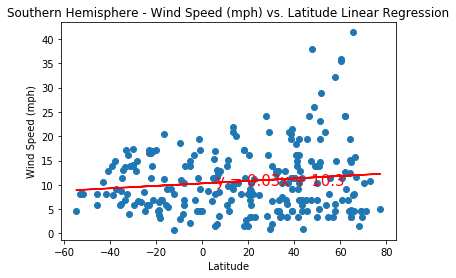

In [102]:
x_values = SouthernHemisphere['Latitude']
y_values = SouthernHemisphere ['Wind Speed'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()



In [103]:
print(f"There was no notable correlation from the north and southern Hemiphere on the Wind speed and Latitude plot that was noticeable")

There was no notable correlation from the north and southern Hemiphere on the Wind speed and Latitude plot that was noticeable
